In [37]:
import os
import pandas as pd
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv', index_col=0)
df.head()
idx = pd.to_datetime(df.index).to_period('M')
df.index=idx

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

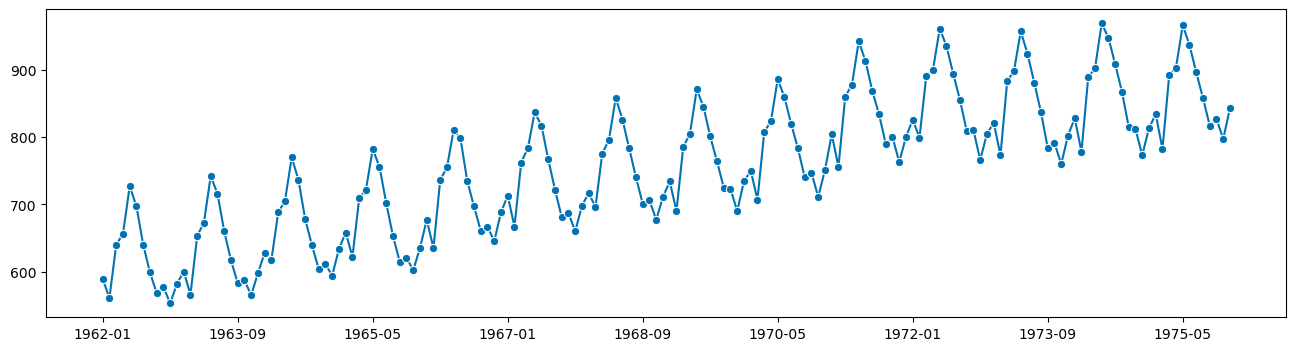

In [39]:
plot_series(df)

In [40]:
y = df['Milk']
y_train, y_test = temporal_train_test_split(y,test_size=12)
print(y_train.shape, y_test.shape)

(156,) (12,)


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

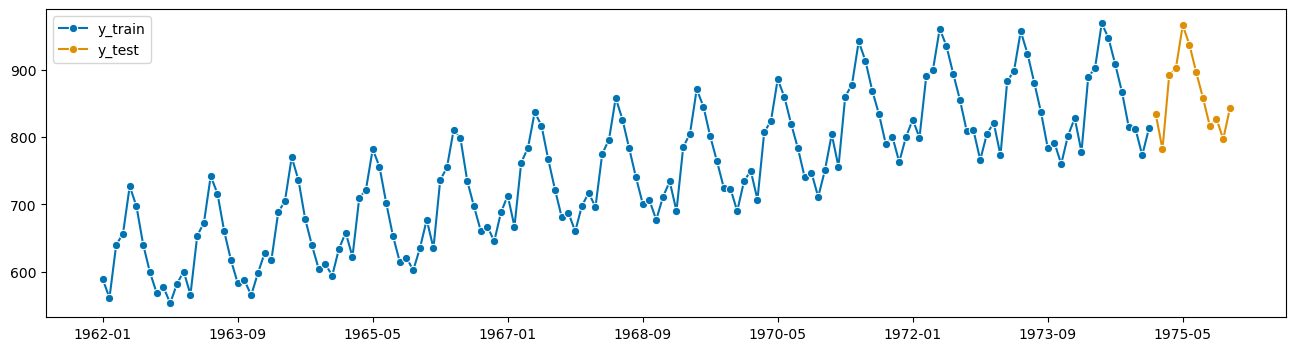

In [41]:
plot_series(y_train, y_test, labels=['y_train', 'y_test'])

Specifying a forecasting horizon

In [42]:
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['1975-01', '1975-02', '1975-03', '1975-04', '1975-05', '1975-06',
             '1975-07', '1975-08', '1975-09', '1975-10', '1975-11', '1975-12'],
            dtype='period[M]', is_relative=False)

Exponential Smoothing

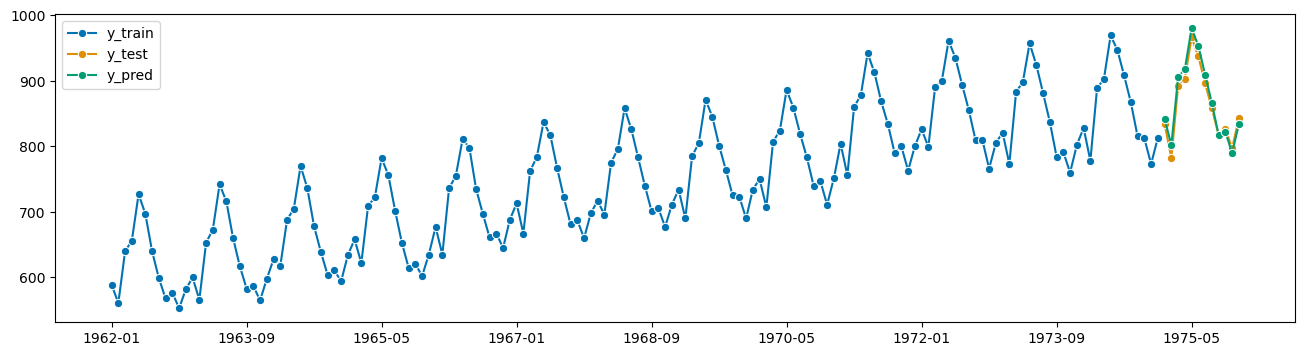

In [43]:
forecaster = ExponentialSmoothing(trend='add', seasonal='additive', sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])
plt.show()

AutoETS

In [44]:
forecaster = AutoETS(auto=True, sp=1)
forecaster.fit(y_train)
print(forecaster.summary())

                                 ETS Results                                  
Dep. Variable:                      y   No. Observations:                  156
Model:                       ETS(ANN)   Log Likelihood                -814.956
Date:                Thu, 16 Nov 2023   AIC                           1635.911
Time:                        18:31:54   BIC                           1645.061
Sample:                    01-31-1962   HQIC                          1639.627
                         - 12-31-1974   Scale                         2018.825
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.065     15.321      0.000       0.872       1.128
initial_level     588.4611     44.969     13.086      0.000     500.324     676.598
Ljung-Box (Q):                  

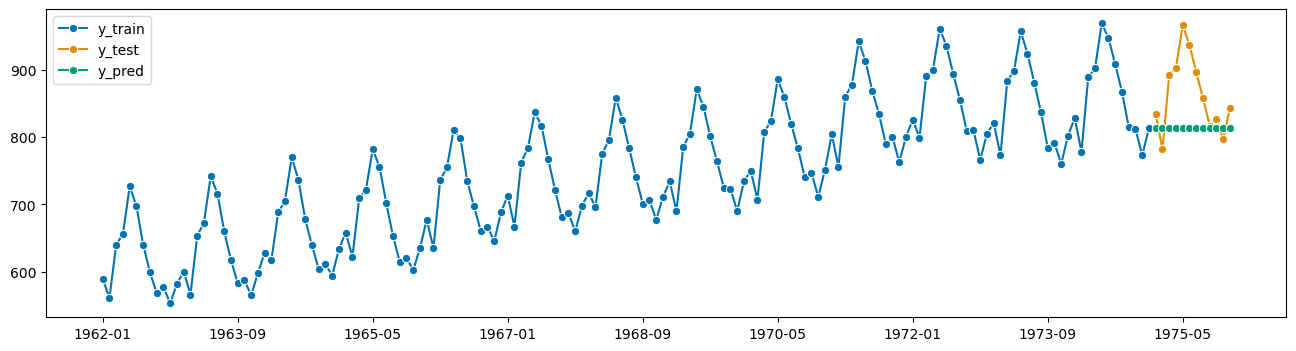

In [45]:
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])
plt.show()

In [46]:
mean_squared_error(y_test, y_pred,square_root=True)

73.49306527777465